# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1109.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           6.83e-43
Time:                        23:51:57   Log-Likelihood:                 6.4232
No. Observations:                  50   AIC:                            -4.846
Df Residuals:                      46   BIC:                             2.802
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0869      0.076     67.270      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.59175093  5.07445229  5.51699424  5.89133044  6.17953634  6.37675411
  6.49199077  6.54663839  6.57095938  6.59911454  6.66355044  6.78966863
  6.99165218  7.27013547  7.61209995  7.99301306  8.38085884  8.74139809
  9.04379377  9.2656774   9.39682418  9.44083291  9.41453464  9.34522746
  9.26619145  9.2112209   9.20907194  9.27873805  9.42632947  9.64406927
  9.91157113 10.19918871 10.4728865  10.69983171 10.85378865 10.91942916
 10.89485097 10.79189028 10.63417705 10.4532527  10.28338794 10.15595219
 10.09425965 10.10973888 10.2000551  10.34949377 10.53154249 10.71324687
 10.86062485 10.9442499 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.93147457 10.78319879 10.51960401 10.18668119  9.84497064  9.5547396
  9.36122675  9.28356618  9.31010271  9.4012455 ]


## Plot comparison

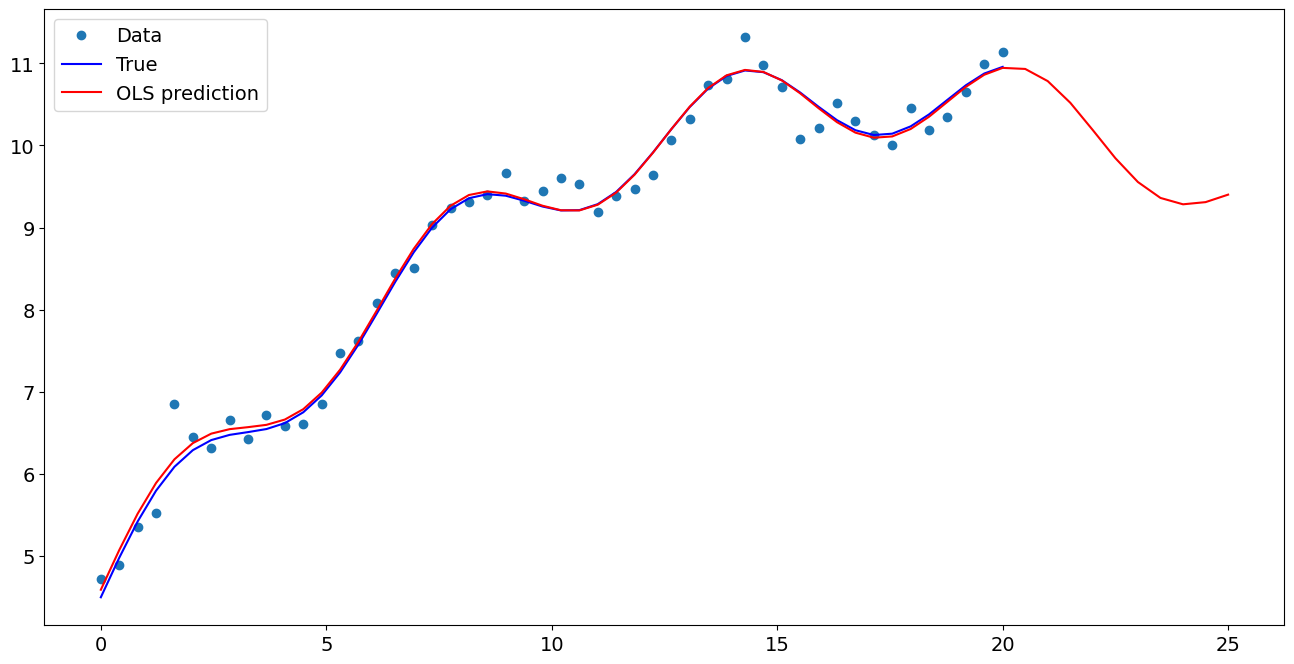

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.086900
x1                  0.492193
np.sin(x1)          0.514620
I((x1 - 5) ** 2)   -0.019806
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.931475
1    10.783199
2    10.519604
3    10.186681
4     9.844971
5     9.554740
6     9.361227
7     9.283566
8     9.310103
9     9.401246
dtype: float64